In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving train.csv to train (1).csv


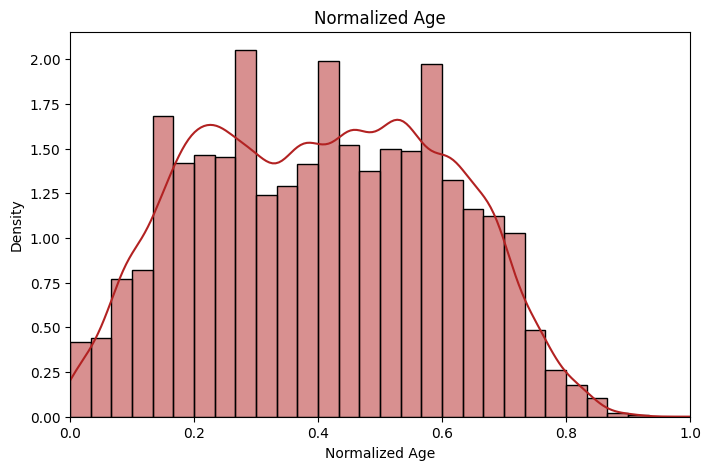

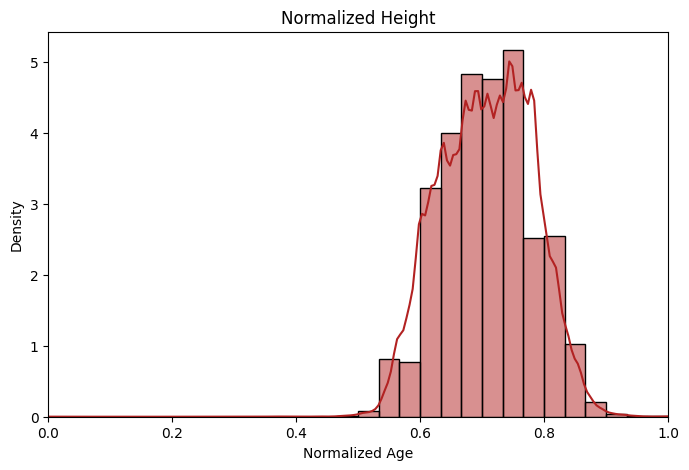

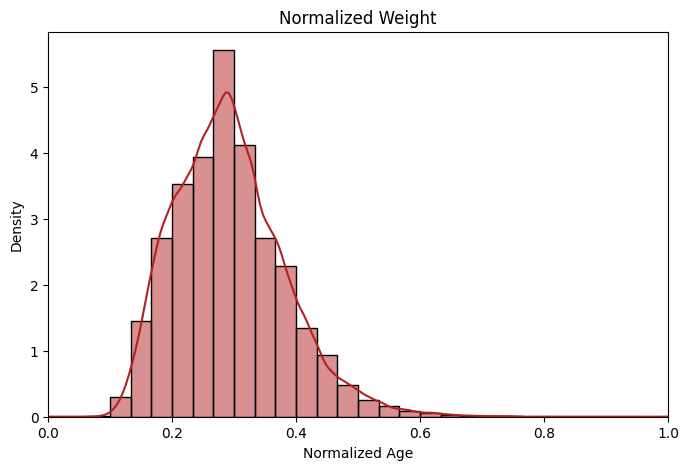

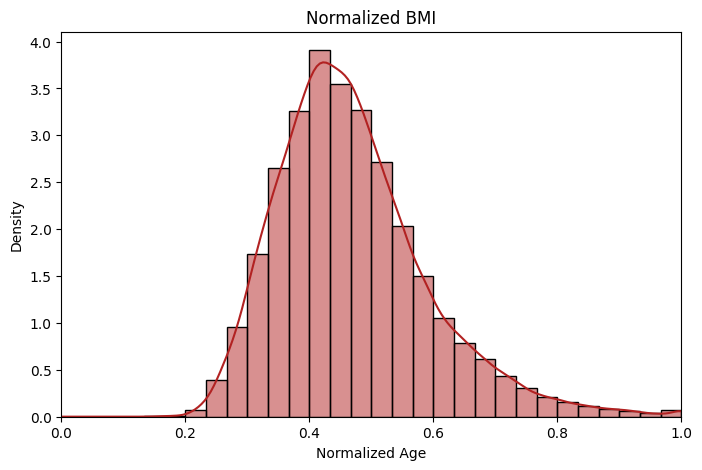

            Age  Height  Weight     BMI
Mean     0.4056  0.7073  0.2926  0.4695
Median   0.4030  0.7091  0.2887  0.4513
Std Dev  0.1972  0.0742  0.0890  0.1222
IQR      0.3284  0.1091  0.1192  0.1473


<ipython-input-8-51de8535b0b6>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=response, palette=palette)


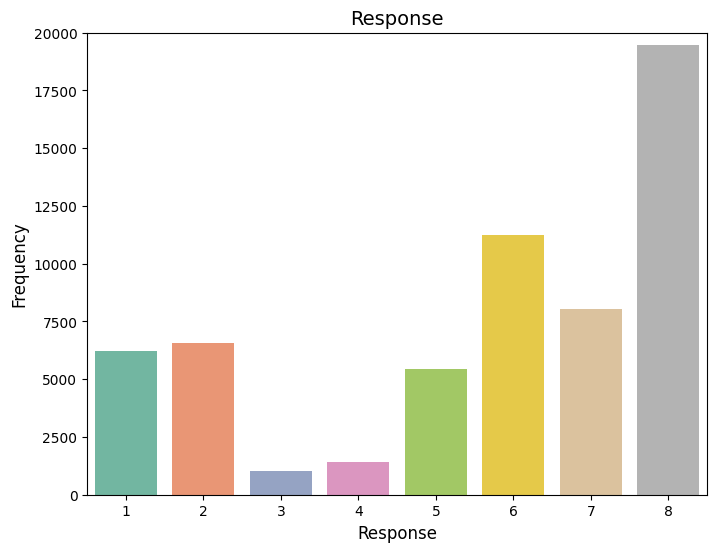

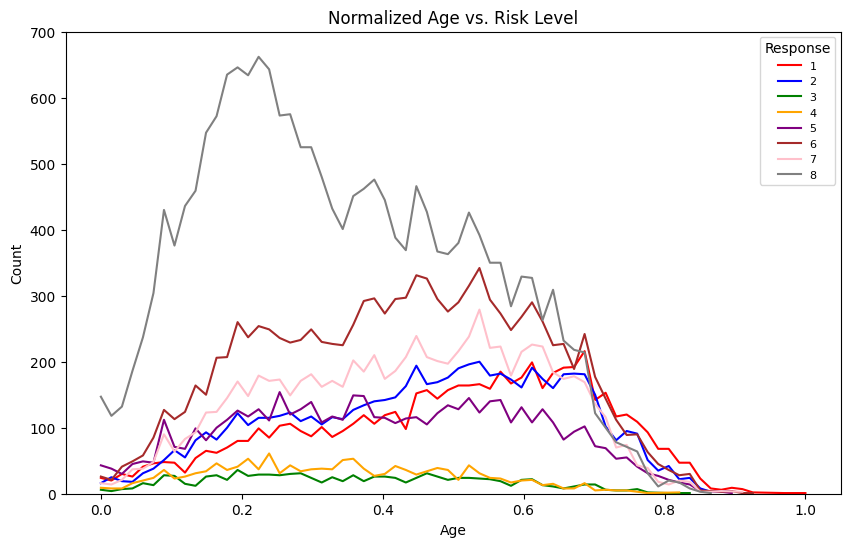

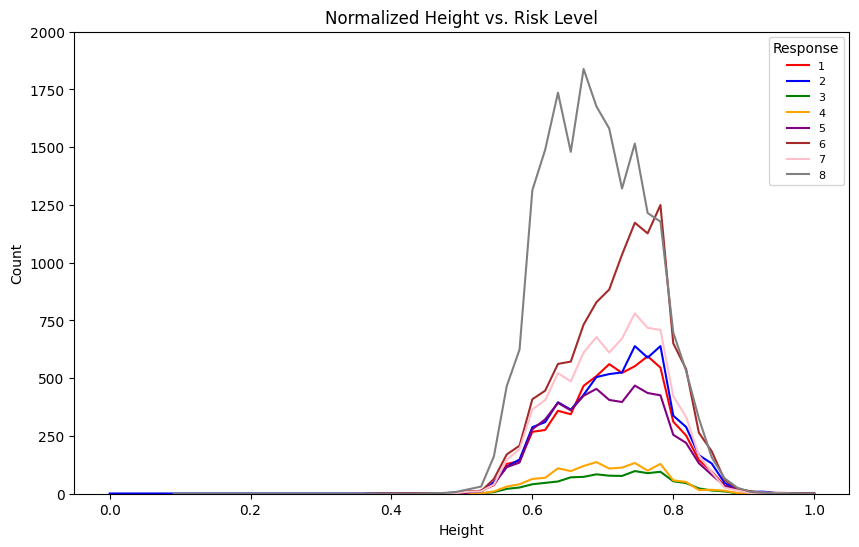

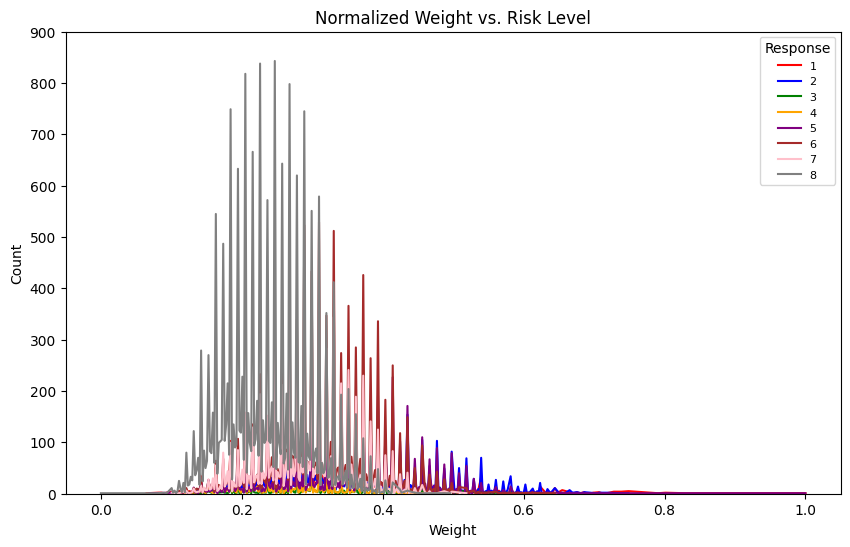

<ipython-input-8-51de8535b0b6>:158: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Response', y='BMI', data=data, palette='Set2')


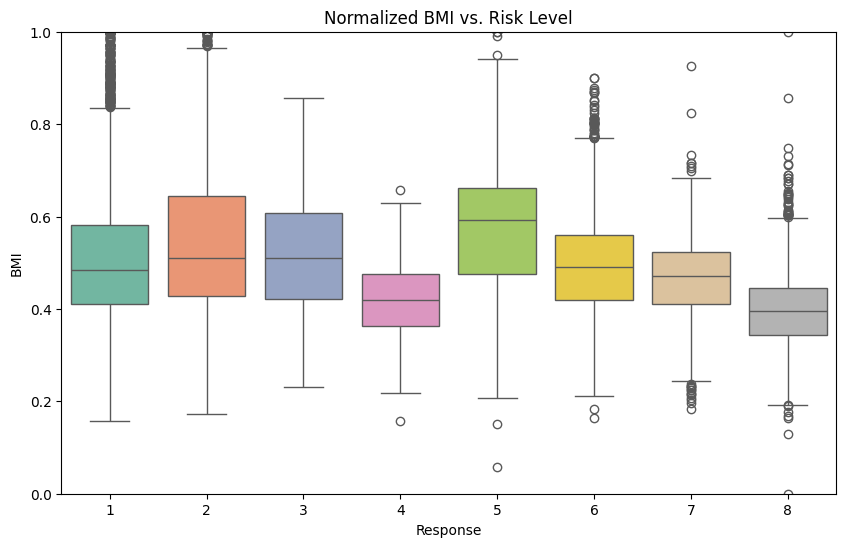

Optimization terminated successfully.
         Current function value: 1.618823
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:               Response   No. Observations:                59381
Model:                        MNLogit   Df Residuals:                    59346
Method:                           MLE   Df Model:                           28
Date:                Wed, 27 Nov 2024   Pseudo R-squ.:                  0.1048
Time:                        14:05:52   Log-Likelihood:                -96127.
converged:                       True   LL-Null:                   -1.0738e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
Response=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9230      0.818     -3.574      0.000      -4.526      -1.320
Ins_Age       -0.9189      0.

In [ ]:
import seaborn as sns
from statsmodels.formula.api import mnlogit
from scipy.stats import norm

# Import the Data
data = pd.read_csv('train.csv')
#print(data.head)

#######################################################################################################################################################
# EDA

# Univerate Analysis
# Continuous Variables

# Normalized Age
ins_age = data['Ins_Age']
plt.figure(figsize=(8, 5))
sns.histplot(ins_age, kde=True, color='firebrick', bins=30, stat="density")
plt.xlabel("Normalized Age", fontsize=10)
plt.ylabel("Density", fontsize=10)
plt.title("Normalized Age", fontsize=12)
plt.xlim(0, 1)
plt.grid(visible=False)
plt.show()

# Normalized Height
ins_age = data['Ht']
plt.figure(figsize=(8, 5))
sns.histplot(ins_age, kde=True, color='firebrick', bins=30, stat="density")
plt.xlabel("Normalized Age", fontsize=10)
plt.ylabel("Density", fontsize=10)
plt.title("Normalized Height", fontsize=12)
plt.xlim(0, 1)
plt.grid(visible=False)
plt.show()

# Normalized Weight
ins_age = data['Wt']
plt.figure(figsize=(8, 5))
sns.histplot(ins_age, kde=True, color='firebrick', bins=30, stat="density")
plt.xlabel("Normalized Age", fontsize=10)
plt.ylabel("Density", fontsize=10)
plt.title("Normalized Weight", fontsize=12)
plt.xlim(0, 1)
plt.grid(visible=False)
plt.show()

# Normalized BMI
ins_age = data['BMI']
plt.figure(figsize=(8, 5))
sns.histplot(ins_age, kde=True, color='firebrick', bins=30, stat="density")
plt.xlabel("Normalized Age", fontsize=10)
plt.ylabel("Density", fontsize=10)
plt.title("Normalized BMI", fontsize=12)
plt.xlim(0, 1)
plt.grid(visible=False)
plt.show()


# Summary Statistics
def IQR(x):
    # Calculate summary statistics
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)

    # Compute IQR
    return q3 - q1
# Compute Mean
m1 = [data['Ins_Age'].mean(), data['Ht'].mean(), data['Wt'].mean(), data['BMI'].mean()]
# Compute Median
m2 = [data['Ins_Age'].median(), data['Ht'].median(), data['Wt'].median(), data['BMI'].median()]
# Compute Standard Deviation
d = [data['Ins_Age'].std(), data['Ht'].std(), data['Wt'].std(), data['BMI'].std()]
# Compute IQR (Interquartile Range)
i = [data['Ins_Age'].quantile(0.75) - data['Ins_Age'].quantile(0.25),
     data['Ht'].quantile(0.75) - data['Ht'].quantile(0.25),
     data['Wt'].quantile(0.75) - data['Wt'].quantile(0.25),
     data['BMI'].quantile(0.75) - data['BMI'].quantile(0.25)]
# Combine results into a DataFrame and round to 4 decimal places
summary_stats = pd.DataFrame([m1, m2, d, i], columns=["Age", "Height", "Weight", "BMI"],
                             index=["Mean", "Median", "Std Dev", "IQR"])
# Round the DataFrame to 4 decimal places
summary_stats = summary_stats.round(4)
# Display the summary statistics
print(summary_stats)

# Response Variable
# Example response data
response = data['Response']
# Determine the number of unique categories in 'response'
unique_categories = len(set(response))
# Generate a palette with the correct number of colors
palette = sns.color_palette("Set2", unique_categories)
# Create a count plot (similar to barplot in R)
plt.figure(figsize=(8, 6))
sns.countplot(x=response, palette=palette)
# Customize the plot
plt.xlabel('Response', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Response', fontsize=14)
plt.ylim(0, 20000)  # Adjust the y-axis limit if needed
# Show the plot
plt.show()

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']

# Separate Subsets by Response Variable
r1 = data[data['Response'] == 1]
r2 = data[data['Response'] == 2]
r3 = data[data['Response'] == 3]
r4 = data[data['Response'] == 4]
r5 = data[data['Response'] == 5]
r6 = data[data['Response'] == 6]
r7 = data[data['Response'] == 7]
r8 = data[data['Response'] == 8]

# Age Analysis
plt.figure(figsize=(10, 6))
for i, r in enumerate([r1, r2, r3, r4, r5, r6, r7, r8], start=1):
    age_counts = r['Ins_Age'].value_counts().sort_index()
    plt.plot(age_counts.index, age_counts.values, label=str(i), color=colors[i-1])

plt.title('Normalized Age vs. Risk Level')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Response', loc='upper right', fontsize=8)
plt.ylim(0, 700)
plt.show()

# Height Analysis
plt.figure(figsize=(10, 6))
for i, r in enumerate([r1, r2, r3, r4, r5, r6, r7, r8], start=1):
    ht_counts = r['Ht'].value_counts().sort_index()
    plt.plot(ht_counts.index, ht_counts.values, label=str(i), color=colors[i-1])

plt.title('Normalized Height vs. Risk Level')
plt.xlabel('Height')
plt.ylabel('Count')
plt.legend(title='Response', loc='upper right', fontsize=8)
plt.ylim(0, 2000)
plt.show()

# Weight Analysis
plt.figure(figsize=(10, 6))
for i, r in enumerate([r1, r2, r3, r4, r5, r6, r7, r8], start=1):
    wt_counts = r['Wt'].value_counts().sort_index()
    plt.plot(wt_counts.index, wt_counts.values, label=str(i), color=colors[i-1])

plt.title('Normalized Weight vs. Risk Level')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.legend(title='Response', loc='upper right', fontsize=8)
plt.ylim(0, 900)
plt.show()

# BMI Analysis (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='BMI', data=data, palette='Set2')
plt.title('Normalized BMI vs. Risk Level')
plt.xlabel('Response')
plt.ylabel('BMI')
plt.ylim(0, 1)
plt.show()

# Multivariate Analysis - Multinomial Logistic Regression
# Model formula: Response ~ Ins_Age + Ht + Wt + BMI
model = mnlogit('Response ~ Ins_Age + Ht + Wt + BMI', data=data)
result = model.fit()

# Summarize the model results
print(result.summary())

In [ ]:
# Change Response to Binary Response - Approved or Rejected, 0 means approved (class 1-7), and 1 means rejected (class 8)
print(data['Response'].value_counts())

data = data.replace({'Response': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1}})
print(data['Response'].value_counts())

Response
8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: count, dtype: int64
Response
0    39892
1    19489
Name: count, dtype: int64


In [ ]:
# Data Cleaning

# Import required libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Print the Original shape
print(f"Original shape: {data.shape}")

# Step 1: Delete attributes with more than 30% missing data
missing_threshold = 0.3 * len(data)
columns_to_keep = [col for col in data.columns if data[col].isna().sum() < missing_threshold]
cleandata = data[columns_to_keep]
print(f"Shape after removing columns with >30% missing data: {cleandata.shape}")

# Step 2: Multiple Imputation for Missing Values
numerical_cols = cleandata.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = cleandata.select_dtypes(include=['object', 'category']).columns

# Impute missing numerical values using IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)
cleandata[numerical_cols] = imputer.fit_transform(cleandata[numerical_cols])

# Impute missing categorical values with the most frequent value
cleandata[categorical_cols] = cleandata[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Drop column Id as it referred as unique identifiers associated with each application, no contribution for classification results
cleandata = cleandata.drop('Id', axis=1)
# Print the shape after data cleaning
print(f"Shape after data cleaning: {cleandata.shape}")

# Import our clean data to csv file after data imputation
cleandata.to_csv("train_clean.csv", index=False)

Original shape: (59381, 128)
Shape after removing columns with >30% missing data: (59381, 119)


<ipython-input-10-b0077aafa755>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandata[numerical_cols] = imputer.fit_transform(cleandata[numerical_cols])
<ipython-input-10-b0077aafa755>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandata[categorical_cols] = cleandata[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))


Shape after data cleaning: (59381, 118)


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import os

# Data Pre-processing

# Convert categorical variables to one-hot encoding
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
encoded_data = encoder.fit_transform(cleandata[categorical_cols])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Combine numerical and encoded categorical columns
cleandata_onehot = cleandata.copy().drop(columns=categorical_cols).reset_index(drop=True)
cleandata_onehot = pd.concat([cleandata_onehot, encoded_df], axis=1)
print(cleandata_onehot.shape)

# Split the cleandata_onehot to train and test data
X = cleandata_onehot.copy().drop(columns = "Response") # Select the feature columns
y = cleandata_onehot['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Training class distribution:\n{y_train.value_counts()}")
print(f"Testing class distribution:\n{y_test.value_counts()}")

'''
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
'''

(59381, 135)
Training class distribution:
Response
0.0    29866
1.0    14669
Name: count, dtype: int64
Testing class distribution:
Response
0.0    10026
1.0     4820
Name: count, dtype: int64


'\nprint(X_train.shape)\nprint(X_test.shape)\nprint(y_train.shape)\nprint(y_test.shape)\n'

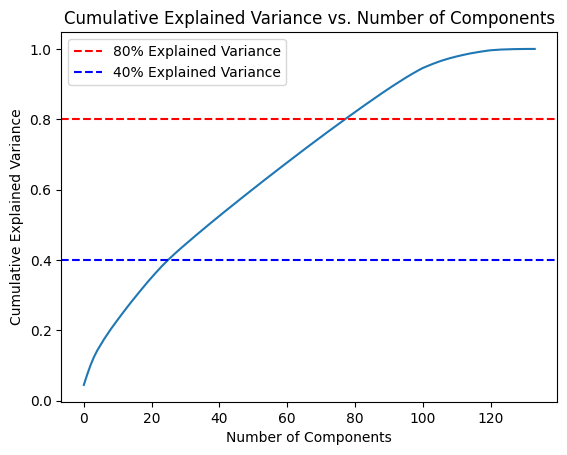

Number of components to retain 80% explained variance: 79
Number of components to retain 40% explained variance: 26


In [ ]:
# Data Pre-processing: PCA
# Apply PCA to reduce the dimensionality

# Step 1: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)       # Only transform on test data

# Step 2: Select the number of components
pca = PCA()
pca.fit(X_train_scaled)
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.axhline(y = 0.8, color='red', linestyle='--', label = '80% Explained Variance')
plt.axhline(y = 0.4, color='blue', linestyle='--', label = '40% Explained Variance')
plt.legend(loc = 'upper left')
plt.show()

n_components_1 = np.argmax(cum_explained_variance >= 0.8) + 1
n_components_2 = np.argmax(cum_explained_variance >= 0.4) + 1

print(f"Number of components to retain 80% explained variance: {n_components_1}")
print(f"Number of components to retain 40% explained variance: {n_components_2}")

# Step 3: Apply PCA with the selected number of components

pca_80 = PCA(n_components=n_components_1, random_state=0)
X_train_pca_80 = pca_80.fit_transform(X_train_scaled)
X_test_pca_80 = pca_80.transform(X_test_scaled)

pca_40 = PCA(n_components=n_components_2, random_state=0)
X_train_pca_40 = pca_40.fit_transform(X_train_scaled)
X_test_pca_40 = pca_40.transform(X_test_scaled)

# Step 4: Convert PCA output to a DataFrame (optional, for better interpretability)
X_train_pca_df_80 = pd.DataFrame(X_train_pca_80, columns=[f'PCA_{i+1}' for i in range(X_train_pca_80.shape[1])])
X_test_pca_df_80 = pd.DataFrame(X_test_pca_80, columns=[f'PCA_{i+1}' for i in range(X_test_pca_80.shape[1])])

X_train_pca_df_40 = pd.DataFrame(X_train_pca_80, columns=[f'PCA_{i+1}' for i in range(X_train_pca_80.shape[1])])
X_test_pca_df_40 = pd.DataFrame(X_test_pca_80, columns=[f'PCA_{i+1}' for i in range(X_test_pca_80.shape[1])])

In [ ]:
# Logistic Regression with Optimized Search, PCA (80%)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_auc_score

# Define logistic regression model
model = LogisticRegression()

# Reduced hyperparameter grid
solvers = ['liblinear', 'lbfgs']
penalty = ['l2']
c_values = [1.0, 0.1, 0.01]
grid = dict(solver=solvers, penalty=penalty, C=c_values)

# Cross-validation with fewer splits and repeats
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)

# Randomized Search (As n_iter = 6, this is equivalent to grid search)
random_search = RandomizedSearchCV(estimator=model, param_distributions=grid, n_iter=6,
                                   n_jobs=-1, cv=cv, scoring='accuracy', random_state=0)
random_result = random_search.fit(X_train_pca_80, y_train)

# Best parameters and results
print(f"Best Accuracy: {random_result.best_score_:.4f} using {random_result.best_params_}")

# Train the final model
best_model = LogisticRegression(**random_result.best_params_)
best_model.fit(X_train_pca_80, y_train)

# Evaluate on training and test sets
train_accuracy = best_model.score(X_train_pca_80, y_train)
test_accuracy = best_model.score(X_test_pca_80, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Predictions and error metrics
y_pred = best_model.predict(X_test_pca_80)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_pca_80)[:,1]) #This was changed compared to the original code

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


Best Accuracy: 0.7934 using {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.01}
Training Accuracy: 0.7954
Testing Accuracy: 0.7927
Mean Absolute Error: 0.2073
Mean Squared Error: 0.2073
ROC AUC Score: 0.8647


In [ ]:
# Logistic Regression with Optimized Search, PCA(40%)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_auc_score

# Define logistic regression model
model = LogisticRegression()

# Reduced hyperparameter grid
solvers = ['liblinear', 'lbfgs']
penalty = ['l2']
c_values = [1.0, 0.1, 0.01]
grid = dict(solver=solvers, penalty=penalty, C=c_values)

# Cross-validation with fewer splits and repeats
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)

# Use PCA-40 dataset for both training and evaluation
random_search = RandomizedSearchCV(estimator=model, param_distributions=grid, n_iter=6,
                                   n_jobs=-1, cv=cv, scoring='accuracy', random_state=0)
random_result = random_search.fit(X_train_pca_40, y_train)

# Best parameters and results
print(f"Best Accuracy: {random_result.best_score_:.4f} using {random_result.best_params_}")

# Train the final model
best_model = LogisticRegression(**random_result.best_params_)
best_model.fit(X_train_pca_40, y_train)

# Evaluate on training and test sets
train_accuracy = best_model.score(X_train_pca_40, y_train)
test_accuracy = best_model.score(X_test_pca_40, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Predictions and error metrics
y_pred = best_model.predict(X_test_pca_40)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_pca_40)[:,1])

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Best Accuracy: 0.7854 using {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1.0}
Training Accuracy: 0.7862
Testing Accuracy: 0.7830
Mean Absolute Error: 0.2170
Mean Squared Error: 0.2170
ROC AUC Score: 0.8530


In [ ]:
# Logistic Regression with Optimized Search (Original Data)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_auc_score

# Define logistic regression model
model = LogisticRegression()

# Reduced hyperparameter grid
solvers = ['liblinear', 'lbfgs']
penalty = ['l2']
c_values = [1.0, 0.1, 0.01]
grid = dict(solver=solvers, penalty=penalty, C=c_values)

# Cross-validation with fewer splits and repeats
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)

# Use PCA-40 dataset for both training and evaluation
random_search = RandomizedSearchCV(estimator=model, param_distributions=grid, n_iter=6,
                                   n_jobs=-1, cv=cv, scoring='accuracy', random_state=0)
random_result = random_search.fit(X_train, y_train)

# Best parameters and results
print(f"Best Accuracy: {random_result.best_score_:.4f} using {random_result.best_params_}")

# Train the final model
best_model = LogisticRegression(**random_result.best_params_)
best_model.fit(X_train, y_train)


# Evaluate on training and test sets
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Predictions and error metrics
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Best Accuracy: 0.8150 using {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}
Training Accuracy: 0.8163
Testing Accuracy: 0.8131
Mean Absolute Error: 0.1869
Mean Squared Error: 0.1869
ROC AUC Score: 0.8853


In [ ]:
# SVM (80% PCA)
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Define SVM model
svc = SVC(probability = True)

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1],               # Regularization parameter
    'kernel': ['linear', 'poly'],     # Kernel types to test
    'decision_function_shape': ['ovr']  # Multi-class strategy (One-vs-Rest or One-vs-One), no difference since we have binary response 0 or 1
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=0)

# Fit the model using GridSearchCV
grid_result = grid_search.fit(X_train_pca_80, y_train)

# Best parameters and results
print(f"Best Accuracy: {grid_result.best_score_:.4f} using {grid_result.best_params_}")

# Train the final model
best_model = SVC(**grid_result.best_params_)
best_model.fit(X_train_pca_80, y_train)

# Evaluate on training and test sets
train_accuracy = best_model.score(X_train_pca_80, y_train)
test_accuracy = best_model.score(X_test_pca_80, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Predictions and error metrics
y_pred = best_model.predict(X_test_pca_80)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Compute ROC AUC Score
y_pred_prob = best_model.predict_proba(X_test_pca_80)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Print classification report for the test set
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# SVM (40% PCA)
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize

# Define SVM model with probability estimation
svc = SVC(probability = True)

# Define the parameter grid to search over
param_grid = {
    'C': [0.1,1,10],               # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],     # Kernel types to test
    'decision_function_shape': ['ovr'],  # Multi-class strategy (One-vs-Rest or One-vs-One)
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=0)

# Fit the model using GridSearchCV
grid_result = grid_search.fit(X_train_pca_40, y_train)

# Best parameters and results
print(f"Best Accuracy: {grid_result.best_score_:.4f} using {grid_result.best_params_}")

# Train the final model
best_model = SVC(**grid_result.best_params_, probability = True)
best_model.fit(X_train_pca_40, y_train)

# Evaluate on training and test sets
train_accuracy = best_model.score(X_train_pca_40, y_train)
test_accuracy = best_model.score(X_test_pca_40, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Predictions and error metrics
y_pred = best_model.predict(X_test_pca_40)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Compute ROC AUC Score (Multi-class)
# Binarize the labels for multi-class ROC AUC calculation
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = best_model.predict_proba(X_test_pca_40)
roc_auc = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')

print(f"ROC AUC Score: {roc_auc:.4f}")

# Print classification report for the test set
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Accuracy: 0.4430 using {'C': 1, 'decision_function_shape': 'ovr', 'kernel': 'linear'}
Training Accuracy: 0.4436
Testing Accuracy: 0.4414
Mean Absolute Error: 1.5933
Mean Squared Error: 6.5583
ROC AUC Score: 0.7365

Classification Report:
               precision    recall  f1-score   support

         1.0       0.39      0.23      0.29      1608
         2.0       0.35      0.16      0.22      1648
         3.0       0.00      0.00      0.00       252
         4.0       0.00      0.00      0.00       359
         5.0       0.32      0.03      0.05      1389
         6.0       0.28      0.42      0.34      2802
         7.0       0.40      0.19      0.25      1968
         8.0       0.55      0.90      0.68      4820

    accuracy                           0.44     14846
   macro avg       0.29      0.24      0.23     14846
weighted avg       0.39      0.44      0.38     14846



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# SVM (Original Data)
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize

# Define SVM model with probability estimation
svc = SVC(probability = True)

# Define the parameter grid to search over
param_grid = {
    'C': [0.1],               # Regularization parameter
    'kernel': ['linear'],     # Kernel types to test
    'decision_function_shape': ['ovr']  # Multi-class strategy (One-vs-Rest or One-vs-One)
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=0)

# Fit the model using GridSearchCV
grid_result = grid_search.fit(X_train, y_train)

# Best parameters and results
print(f"Best Accuracy: {grid_result.best_score_:.4f} using {grid_result.best_params_}")

# Train the final model
best_model = SVC(**grid_result.best_params_, probability = True)
best_model.fit(X_train, y_train)

# Evaluate on training and test sets
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Predictions and error metrics
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Compute ROC AUC Score (Multi-class)
# Binarize the labels for multi-class ROC AUC calculation
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = best_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')

print(f"ROC AUC Score: {roc_auc:.4f}")

# Print classification report for the test set
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
'''
# Logistic Regression

#Import Libraries
from numpy import array
from numpy import argmax
from csv import reader

import sklearn
import sklearn.datasets
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,
                           scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


logisticRegr = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

logisticRegr.fit(X, y)
training_score = logisticRegr.score(X,y)
test_score = logisticRegr.score(X_test,y_test)
y_test = test[['Response']].copy()
X_test = test.drop('Response', axis=1)
X_test = X_test.drop('Id', axis=1)
cfs_predictions = logisticRegr.predict(X_test)
mean_absolute_error(y_test,cfs_predictions)
mean_squared_error(y_test,cfs_predictions)

#X=X.drop('Id',axis=1)
y = train[['Response']].copy()

pca_y_train= pca_train[['Response']].copy()
pca_y_test= pca_test[['Response']].copy()
pca_X_train=pca_train.drop('Id',axis=1)
pca_X_train=pca_X_train.drop('Response',axis=1)
pca_X_train=pca_X_train.drop('Unnamed: 22',axis=1)
pca_X_train=pca_X_train.drop('Unnamed: 23',axis=1)
pca_X_train=pca_X_train.drop('Unnamed: 24',axis=1)
pca_X_train=pca_X_train.drop('Unnamed: 25',axis=1)
pca_X_train=pca_X_train.drop('Unnamed: 26',axis=1)

pca_X_test=pca_test.drop('Id',axis=1)
pca_X_test=pca_X_test.drop('Response',axis=1)

logisticRegr.fit(pca_X_train, pca_y_train)
training_score = logisticRegr.score(pca_X_train, pca_y_train)
test_score = logisticRegr.score(pca_X_test,pca_y_test)

pca_predictions = logisticRegr.predict(pca_X_test)
mean_absolute_error(y_test,pca_predictions)
mean_squared_error(y_test,pca_predictions)

'''